# The Beat Goes On II: Using Data to Classify Heart disease

## Table of Contents
* [Introduction](#introduction)
* [Goal](#goal)
* [Summary](#summary)
* [The Data](#the_data)
  * [Data Cleaning](#data_cleaning)
  * [Exploratory Data Analysis](#eda)
  * [Dummy Variables](#dummy_variables)
* [Dividing the Data](#dividing_the_data)
* [Building the Model](#building_the_model)
  * [The model's coefficients](#the_models_coefficients)
  * [Filtering the Predictors list](#filtering_the_predictors_list)
    * [Cross-Validation Check](#cross_validation_check)
* [Rebuilding the Model](#rebuilding_the_model)
* [The model's metrics](#the_models_metrics)
* [Final Model Evaluation](#final_model_evaluation)
* [Conclusions and Next Steps](#conclusions_and_next_steps)

## Introduction  <a name="introduction"></a>

Heart disease remains a critical global health challenge, claiming millions of lives annually and imposing substantial economic burdens on healthcare systems. Early detection and risk assessment are paramount in mitigating its devastating impacts, making predictive modelling an increasingly important tool in modern medical diagnostics.
By leveraging machine learning techniques, researchers can develop sophisticated models that transform complex medical data into actionable insights.

This project explores the application of logistic regression to predict heart disease risk using a set of clinical and demographic features. By analyzing multiple predictive variables and evaluating model performance through cross-validation and metric assessment, I aim to develop a reliable screening tool that can support healthcare professionals in identifying individuals at higher risk of cardiovascular complications. My approach combines statistical methodology with data-driven insights to create a predictive model that balances accuracy, sensitivity, and clinical relevance.

## Goal  <a name="goal"></a>

Develop a logistic regression model that achieves at least 75% accuracy, sensitivity, and specificity in predicting heart disease risk, using a validated dataset with comprehensive clinical features, to create a reliable screening tool that can identify potential cardiovascular risks with high diagnostic performance.

## Summary  <a name="summary"></a>

In this project I developed a logistic regression model to predict heart disease risk using a set of clinical and demographic features.
I identified key predictors and built a predictive model with strong performance metrics. The model was trained and validated using a structured approach that emphasized both statistical significance and clinical relevance.

The final model demonstrated robust predictive capabilities, achieving `83%` accuracy across training and test datasets, with a sensitivity of `89%` and specificity of `78%`. By balancing high detection rates of positive cases with a moderate false-positive rate, the model provides a valuable screening tool that can assist healthcare professionals in early identification of potential heart disease risks.

## The Data <a name="the_data"></a>

The [dataset](https://archive.ics.uci.edu/dataset/45/heart+disease) comes from the famous Cleveland Clinic Foundation, which recorded information on 14  patient characteristics, including age and chest pain, to try to classify the presence of heart disease in an individual.
It's been uploaded to the [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/) under the [Creative Commons Attribution 4.0 International license](https://creativecommons.org/licenses/by/4.0/legalcode).

The following is some boilerplate code that loads the required libraries, reads the data and displays some initial information about it:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.pipeline import Pipeline

from scipy import stats

from itertools import combinations

plt.style.use('seaborn-v0_8')


In [2]:
# Reading the file
data = pd.read_csv("heart_disease.csv")

In [3]:
data.shape

(303, 15)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    int64  
 3   cp          303 non-null    int64  
 4   trestbps    303 non-null    int64  
 5   chol        303 non-null    int64  
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     303 non-null    int64  
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    object 
 13  thal        303 non-null    object 
 14  present     303 non-null    int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 35.6+ KB


In [5]:
data.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,present
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,152.000000,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.458746
std,87.612784,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.499120
min,1.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,76.500000,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,152.000000,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,227.500000,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,303.000000,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


The dataset has 303 observations, each with 14 features.
There are no missing features from any of the observations.

The features are as follows:

| Variable Name | Role    | Type        | Demographic | Description                                                  | Units |
| ------------- | ------- | ----------- | ----------- | -------------------------------------------------------------| ----- |
| age           | Feature | Integer     | Age         | Patient's age                                                | years |
| sex           | Feature | Categorical | Sex         | Patient's sex  (**1**: male; **0**: female)                  |       |
| cp            | Feature | Categorical |             | Chest pain type                                              |       |
|               |         |             |             | **1**: typical angina                                        |       |
|               |         |             |             | **2**: atypical angina                                       |       |
|               |         |             |             | **3**: non-anginal pain                                      |       |
|               |         |             |             | **4**: asymptomatic                                          |       |
| trestbps      | Feature | Integer     |             | Resting blood pressure (on admission to the hospital)        | mm Hg |
| chol          | Feature | Integer     |             | Serum cholesterol                                            | mg/dl |
| fbs           | Feature | Categorical |             | Fasting blood sugar > 120 mg/dl (**1**: true; **0**:false)   |       |
| restecg       | Feature | Categorical |             | Resting electrocardiographic results                         |       |
|               |         |             |             | **0**: normal                                                |       |
|               |         |             |             | **1**: abnormal ST-T wave                                    |       |
|               |         |             |             | **2**: showing probable or definite left v. hypertrophy      |       |
| thalach       | Feature | Integer     |             | Maximum heart rate achieved                                  | bpm   |
| exang         | Feature | Categorical |             | Exercise-induced angina (**1**: true; **0**:false)           |       |
| oldpeak       | Feature | Integer     |             | ST depression induced by exercise relative to rest           | mm    |
| slope         | Feature | Categorical |             | The slope of the peak exercise ST segment                    |       |
|               |         |             |             | **1**: upsloping; **2**: flat; **3**: downsloping            |       |
| ca            | Feature | Integer     |             | Number of major vessels (**0**-**3**) coloured by fluoroscopy|       |
| thal          | Feature | Categorical |             | Thalassemia type                                             |       |
|               |         |             |             | **3**: normal; **6**: fixed defect; **7**: reversible defect |       |
| present       | Target  | Integer     |             | Diagnosis of heart disease (**1**: true; **0**: false)       |       |              |o             |rt disease		no

### Data Cleaning <a name="data_cleaning"></a>

The data looks good. It has no missing values, no apparent outliers and the columns' names are well-formatted (other than `Unnamed: 0`, which will be removed since it's simply a running index and I have no use for it). One thing I noticed is that `ca` and `thal`, while they should both be numbers, are `object`s. Why is that?

In [7]:
data['ca'].value_counts()

ca
0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: count, dtype: int64

In [8]:
data['thal'].value_counts()

thal
3.0    166
7.0    117
6.0     18
?        2
Name: count, dtype: int64

Both of these features have a few missing values (`?`), which also turned each feature into a string. To fix that I'll convert their type to `float` while changing each `?` into `NaN`:

In [9]:
data['ca'] = pd.to_numeric(data['ca'], errors='coerce')
data['thal'] = pd.to_numeric(data['thal'], errors='coerce')

Now I'll remove all rows with null values:

In [10]:
data.dropna(inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  297 non-null    int64  
 1   age         297 non-null    int64  
 2   sex         297 non-null    int64  
 3   cp          297 non-null    int64  
 4   trestbps    297 non-null    int64  
 5   chol        297 non-null    int64  
 6   fbs         297 non-null    int64  
 7   restecg     297 non-null    int64  
 8   thalach     297 non-null    int64  
 9   exang       297 non-null    int64  
 10  oldpeak     297 non-null    float64
 11  slope       297 non-null    int64  
 12  ca          297 non-null    float64
 13  thal        297 non-null    float64
 14  present     297 non-null    int64  
dtypes: float64(3), int64(12)
memory usage: 37.1 KB


In [12]:
data.describe()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,150.673401,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.461279
std,87.323283,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,0.499340
min,1.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,75.000000,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,150.000000,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,226.000000,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,302.000000,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


Good, from these two tables we can see that `ca` and `thal` are now numeric values that we can use in our analysis. Before moving on to the next stage I'll remove the column `Unnamed: 0`, as mentioned above.

In [13]:
data = data.drop('Unnamed: 0', axis=1)

### Exploratory Data Analysis <a name="eda"></a>

Now I can stratify all the features by the target values and look for features where there's a clear distinction between the group that's been diagnosed with heart disease and the group that hand't. I'll normalize the values to make comparison between features easier.

In [14]:
def visualize_minmax_normalized_feature_means(data, target_column):
    """
    Create a grouped bar chart with MinMax normalized feature means
    
    Parameters:
    -----------
    data : pandas.DataFrame
        DataFrame with features and target column
    target_column : str
        Name of the target column
    
    Returns:
    --------
    None (displays matplotlib figure)
    """
    # Remove the target column from feature list
    feature_columns = [col for col in data.columns if col != target_column]
    
    # Create a copy of the dataframe to avoid modifying the original
    data_normalized = data.copy()
    
    # Normalize the features using MinMaxScaler
    scaler = MinMaxScaler()
    data_normalized[feature_columns] = scaler.fit_transform(data_normalized[feature_columns])
    
    # Calculate mean normalized values for each feature grouped by target
    mean_normalized_values = data_normalized.groupby(target_column).mean()
    
    # Prepare data for plotting
    fig, ax = plt.subplots(figsize=(16, 6))
    
    # Set the width of each bar and the positions
    bar_width = 0.35
    index = np.arange(len(feature_columns))
    
    # Create grouped bar plot
    ax.bar(index, mean_normalized_values.loc[0], bar_width, label='Absent', alpha=0.8)
    ax.bar(index + bar_width, mean_normalized_values.loc[1], bar_width, label='Present', alpha=0.8)
    
    # Customize the plot
    ax.set_title('MinMax Normalized Mean Feature Values by Heart Disease Presence', fontsize=16)
    ax.set_xlabel('Features', fontsize=12)
    ax.set_ylabel('Normalized Mean Value (0-1)', fontsize=12)
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(feature_columns, rotation=90)
    ax.legend()
    
    # Add a horizontal grid for easier comparison
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.show()

    return mean_normalized_values

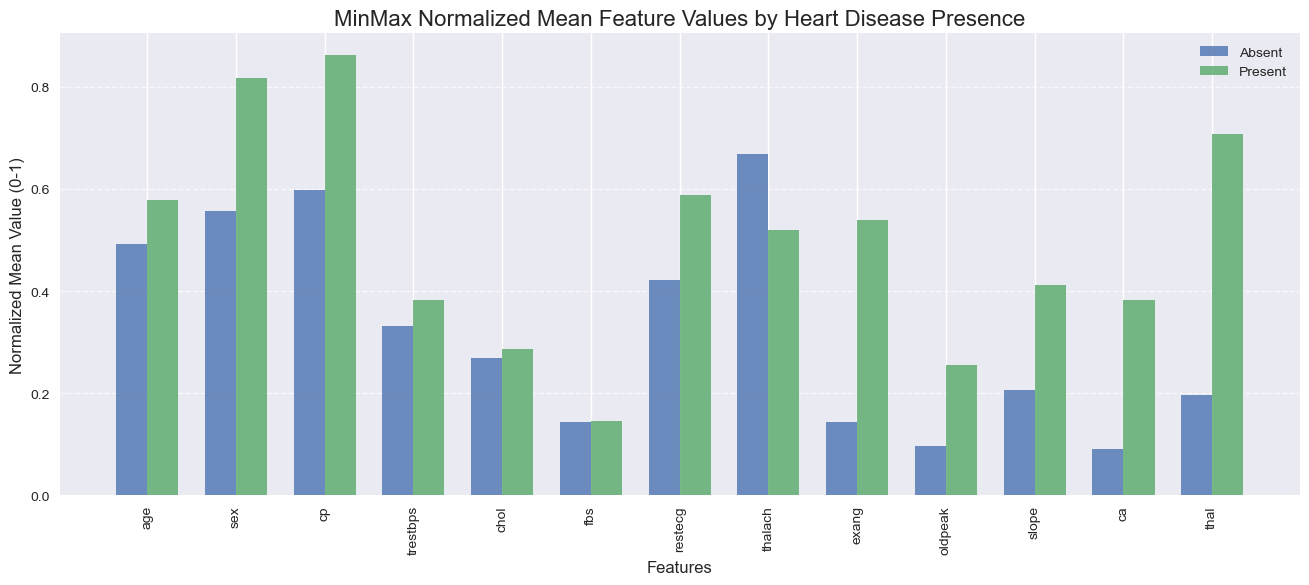

In [15]:
# Call the function with the data
mean_normalized_values = visualize_minmax_normalized_feature_means(data, 'present')

Looking at the normalized stratified groups we can clearly see several features with a clear distinction between the groups. Let's check the values of those differences:

In [16]:
# Transpose the dataframe for readability
mean_normalized_values = mean_normalized_values.T
# Calculate the difference in means
mean_normalized_values['diff'] = abs(mean_normalized_values[0] - mean_normalized_values[1])

In [17]:
# Print the stratified mean values, sorted by the difference in descending order
mean_normalized_values.sort_values(by='diff', ascending=False)

present,0,1,diff
thal,0.196875,0.708029,0.511154
exang,0.143750,0.540146,0.396396
ca,0.091667,0.381995,0.290328
cp,0.597917,0.861314,0.263397
sex,0.556250,0.817518,0.261268
slope,0.206250,0.412409,0.206159
restecg,0.421875,0.587591,0.165716
oldpeak,0.096573,0.256299,0.159726
thalach,0.668559,0.519920,0.148639
age,0.492578,0.578315,0.085737


The features that have the largest distinction between the two groups are `thal`, `exang`, `ca`, `cp` and `sex`. All of these features have over 25% difference in normalized values between the group presenting with heart disease and the group absent of disease.

### Dummy Variables <a name="dummy_variables"></a>

To make the interpretation of the model's coefficients easier it's best to use dummy variables. Of the 5 predictors, one (`ca`) is an integer and two (`exang` and `sex`) are binary, which leaves us with:

In [18]:
categorical_predictors = ['thal', 'cp']

In [19]:
data_dummies = pd.get_dummies(data, columns=categorical_predictors, dtype=int)
data_dummies.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,present,thal_3.0,thal_6.0,thal_7.0,cp_1,cp_2,cp_3,cp_4
0,63,1,145,233,1,2,150,0,2.3,3,0.0,0,0,1,0,1,0,0,0
1,67,1,160,286,0,2,108,1,1.5,2,3.0,1,1,0,0,0,0,0,1
2,67,1,120,229,0,2,129,1,2.6,2,2.0,1,0,0,1,0,0,0,1
3,37,1,130,250,0,0,187,0,3.5,3,0.0,0,1,0,0,0,0,1,0
4,41,0,130,204,0,2,172,0,1.4,1,0.0,0,1,0,0,0,1,0,0


So the initial predictors I'll use to create the model are:

In [20]:
initial_predictors = ['thal_3.0', 'thal_6.0', 'thal_7.0', 'exang', 'ca', 'cp_1', 'cp_2', 'cp_3', 'cp_4', 'sex']

## Dividing the Data <a name="dividing_the_data"></a>

Now that I have chosen the predictors, I need to set aside some data to act as a final assessment for the model. I'll need the following:

* A training set that will be used to estimate the regression coefficients
* A test set that will be used to assess the predictive ability of the model

The model will be fit to the training set, and predictive ability will be assessed on the test set. I'll need to make sure that both sets contain both cases and non-cases.

In [21]:
# Split the dataset into training and validation sets.
# Setting random_state to 2024, for reproducibility
# Setting stratify to y, to keep the same ratio of cases and non-cases between train and test
X = data_dummies[initial_predictors]
y = data_dummies["present"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024, stratify=y)

## Building the Model <a name="building_the_model"></a>

Now I can finally build the logistic regression model:

In [22]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### The model's coefficients <a name="the_models_coefficients"></a>

Now that I've created the model, let's look at the coefficients to see if they make sense, given the problem.

the logistic regression relates the binary outcome to the linear combination of predictors via the link function:

$\log \left(\frac{E Y}{1-E Y}\right)=\beta_0+\beta_1 X$

The predictors affect the outcome on the log-odds scale. The non-intercept coefficients represent the log-odds ratio for a unit increase in a predictor:

$\log \left(\frac{O_1}{O_0}\right)=\beta_1$

Where $O_0$ represents the odds ratio when the predictor is `0`, and $O_1$ represents the odds ratio when the predictor is `1`. However, we're usually interested in examining these effects on the odds scale, so we take `e` to both sides to get the following:

$O_1=e^{\beta_1} O_0$

Let's see what the chosen predictors suggest about their relationship with heart disease.

In [24]:
print("Predictor   Log-odds   Odds")
print("-"*30)
for predictor, log_odds, odds in zip(initial_predictors, model.coef_[0], np.exp(model.coef_[0])):
    print(f"{predictor : <13}{log_odds:5.2f} {odds:8.2f}")

Predictor   Log-odds   Odds
------------------------------
thal_3.0     -0.89     0.41
thal_6.0      0.01     1.01
thal_7.0      0.87     2.40
exang         0.88     2.41
ca            1.19     3.28
cp_1         -0.34     0.71
cp_2         -0.15     0.86
cp_3         -0.64     0.53
cp_4          1.13     3.11
sex           0.68     1.98


### Filtering the Predictors list <a name="filtering_the_predictors_list"></a>

Before interpreting the results, let's first check if all predictors are indeed significant, by calculating each predictor's p-value (I'll assume that `0.05` is my significance threshold).
`scikit` doesn't provide p-values for logistic regression, so I'll generate them using resampling.

In [25]:
def calculate_coefficient_pvalues(model, X, y, n_bootstraps = 1000):
    """
    Calculate p-values for model coefficients
    
    Parameters:
    -----------
    model : fitted scikit-learn logistic regression model
        The fitted logistic regression model
    X : array-like
        The feature matrix used to train the model
    y : array-like
        The target vector used to train the model
    n_bootstraps: int
        The number of bootstrap resamples (default: 1,000)
    
    Returns:
    --------
    pandas.Series: P-values for each coefficient
    """
    # Get the coefficient estimates
    coef = model.coef_[0]
    
    coef_bootstraps = []
    
    for i in range(n_bootstraps):
        # Resample with replacement
        resampled_indices = X.sample(n=len(X), replace=True, random_state=i).index
        X_resampled = X.loc[resampled_indices]
        y_resampled = y[resampled_indices]
        
        # Fit model on resampled data
        bootstrap_model = model.__class__(**(model.get_params()))
        bootstrap_model.fit(X_resampled, y_resampled)
        
        # Store coefficients
        coef_bootstraps.append(bootstrap_model.coef_[0])
    
    # Calculate standard error from bootstrap
    std_err = np.std(coef_bootstraps, axis=0)
    
    # Calculate z-scores
    z_scores = coef / std_err
    
    # Calculate two-sided p-values
    p_values = [2 * (1 - stats.norm.cdf(abs(z))) for z in z_scores]
    
    # Create a Series with feature names if available
    try:
        return pd.Series(p_values, index=model.feature_names_in_)
    except:
        return pd.Series(p_values)

In [26]:
p_values = calculate_coefficient_pvalues(model, X_train, y_train)

In [27]:
# Print the p_values while suppressing scientific notation
print("Predictor   p-value")
print("-"*19)
print(p_values.apply(lambda x: f'{x:.4f}'))

Predictor   p-value
-------------------
thal_3.0    0.0003
thal_6.0    0.9621
thal_7.0    0.0006
exang       0.0082
ca          0.0000
cp_1        0.3660
cp_2        0.6208
cp_3        0.0510
cp_4        0.0000
sex         0.0350
dtype: object


We can clearly see that we have 6 statistically significant predictors (p-value < 0.05), and 4 statistically insignificant ones.      |

#### Cross-Validation Check <a name="cross_validation_check"></a>

To decide if any of the predictors should be removed from the model I'll run a cross-validation check and see if removing any combination of the insignificant predictors has a positive effect on the model's score.

In [28]:
def feature_selection_cv(X, y, p_values, significance_threshold=0.05):
    """
    Perform cross-validation with configurations of significant and insignificant features
    
    Parameters:
    X (DataFrame): Input features
    y (Series): Target variable
    p_values (dict): Dictionary of feature p-values
    significance_threshold (float): P-value threshold for feature significance
    
    Returns:
    dict: Performance of different feature set configurations
    """
    # Identify significant and insignificant features
    significant_features = [
        feature for feature, p_val in p_values.items() 
        if p_val <= significance_threshold
    ]
    
    insignificant_features = [
        feature for feature, p_val in p_values.items() 
        if p_val > significance_threshold
    ]
    
    # Feature configurations
    feature_configs = {}
    
    # Generate configurations with all significant features 
    # plus different combinations of insignificant features
    for r in range(len(insignificant_features) + 1):
        for i, insignificant_combo in enumerate(combinations(insignificant_features, r)):
            # Config name is a combination identifier
            config_name = f'config_sig_plus_{len(insignificant_combo)}_insignificant_{i+1}'
            
            # Combine significant features with current combination of insignificant features
            config_features = significant_features + list(insignificant_combo)
            feature_configs[config_name] = config_features
    
    # Performance tracking
    cv_results = {}
    
    # Cross-validation for each feature configuration
    for config_name, features in feature_configs.items():
        # Prepare the feature subset
        X_subset = X[features]
        
        # Create a pipeline with scaling and logistic regression
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', LogisticRegression(max_iter=1000))
        ])
        
        # Perform cross-validation
        scores = cross_val_score(
            pipeline, 
            X_subset, 
            y, 
            cv=5, 
            scoring='accuracy'
        )
        
        # Store results
        cv_results[config_name] = {
            'mean_accuracy': scores.mean(),
            'std_accuracy': scores.std(),
            'features': features
        }
    
    return cv_results

In [29]:
results = feature_selection_cv(X_train, y_train, p_values)

In [30]:
print("Cross-Validation Results (sorted by mean accuracy):")
for config, metrics in sorted(
    results.items(), 
    key=lambda x: x[1]['mean_accuracy'], 
    reverse=True
):
    print(f"\nConfiguration: {config}")
    print(f"Predictors   : {metrics['features']}")
    print(f"Mean Accuracy: {metrics['mean_accuracy']:.4f} ± {metrics['std_accuracy']:.4f}")

Cross-Validation Results (sorted by mean accuracy):

Configuration: config_sig_plus_0_insignificant_1
Predictors   : ['thal_3.0', 'thal_7.0', 'exang', 'ca', 'cp_4', 'sex']
Mean Accuracy: 0.8480 ± 0.0345

Configuration: config_sig_plus_1_insignificant_1
Predictors   : ['thal_3.0', 'thal_7.0', 'exang', 'ca', 'cp_4', 'sex', 'thal_6.0']
Mean Accuracy: 0.8480 ± 0.0345

Configuration: config_sig_plus_1_insignificant_3
Predictors   : ['thal_3.0', 'thal_7.0', 'exang', 'ca', 'cp_4', 'sex', 'cp_2']
Mean Accuracy: 0.8480 ± 0.0345

Configuration: config_sig_plus_2_insignificant_2
Predictors   : ['thal_3.0', 'thal_7.0', 'exang', 'ca', 'cp_4', 'sex', 'thal_6.0', 'cp_2']
Mean Accuracy: 0.8480 ± 0.0345

Configuration: config_sig_plus_1_insignificant_4
Predictors   : ['thal_3.0', 'thal_7.0', 'exang', 'ca', 'cp_4', 'sex', 'cp_3']
Mean Accuracy: 0.8437 ± 0.0400

Configuration: config_sig_plus_2_insignificant_3
Predictors   : ['thal_3.0', 'thal_7.0', 'exang', 'ca', 'cp_4', 'sex', 'thal_6.0', 'cp_3']
Mean 

As can be seen above, adding any of the statistically insignificant predictors either doesn't change or has a negative effect on the model's accuracy, so I can use the model based solely on the significant predictors:

| Predictor  | p-value | Log-odds | Odds |
|------------|---------|----------|------|
| `thal_3.0` | 0.0003  |    -0.89 | 0.41 |
| `thal_7.0` | 0.0006  |     0.87 | 2.4  |
| `exang`    | 0.0082  |     0.88 | 2.41 |
| `ca`       | 0.0000  |     1.19 | 3.28 |
| `cp_4`     | 0.0000  |     1.13 | 3.11 |
| `sex`      | 0.0350  |     0.68 | 1.98 |

The Odds column tells us how each predictor affects the prediction. For every one unit increase in that predictor, there will be an change in the odds of the outcome by the corresponding odds value. e.g., for every major vessel coloured by fluoroscopy (`ca`), there'll be an increase of `228%` (3.28 - 1) in the odds of the patient having heart disease. 

`thal_3.0` is the only predictor that's negatively linked to the outcome, and having a `thal` of `3.0` (normal Thalassemia) reduces the odds of having heart disease by `59%` (0.41 - 1).

## Rebuilding the Model <a name="rebuilding_the_model"></a>

Before moving forward I'll refit the model, using the selected predictors.

In [31]:
# Setting the selected predictors
predictors = ['thal_3.0', 'thal_7.0', 'exang', 'ca', 'cp_4', 'sex']
X_train = X_train[predictors]

#Refitting the model
model.fit(X_train, y_train)

LogisticRegression()

## The model's metrics <a name="the_models_metrics"></a>

In [32]:
def evaluate_model(y_true, y_pred, y_prob):
    """
    Comprehensive model evaluation function
    
    Parameters:
    y_true: True labels
    y_pred: Predicted labels
    y_prob: Predicted probabilities
    """
    # 1. Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()

    # 2. Confusion Matrix
    disp = ConfusionMatrixDisplay.from_predictions(y_true, y_pred, display_labels=['Absent', 'Present'], text_kw={'fontsize': 12})
    plt.title('Confusion Matrix for the Heart Disease Detection Model', fontsize = 14, pad=20)
    plt.grid(False)
    plt.tight_layout()
    plt.show()
    
    # 3. Detailed Classification Report
    print("Classification Report:")
    print(classification_report(y_true, y_pred))
          
    # 4. Additional Performance Metrics
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = tp / (tp + fp)
    f1_score = 2 * (precision * sensitivity) / (precision + sensitivity)

    print("\nDetailed Performance Metrics:")
    print(f"True Positives (TP): {tp}")
    print(f"True Negatives (TN): {tn}")
    print(f"False Positives (FP): {fp}")
    print(f"False Negatives (FN): {fn}")
    print(f"\nSensitivity (Recall): {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"F1 Score: {f1_score:.4f}")

In [33]:
y_train_pred = model.predict(X_train)
y_train_prob = model.predict_proba(X_train)[:, 1]

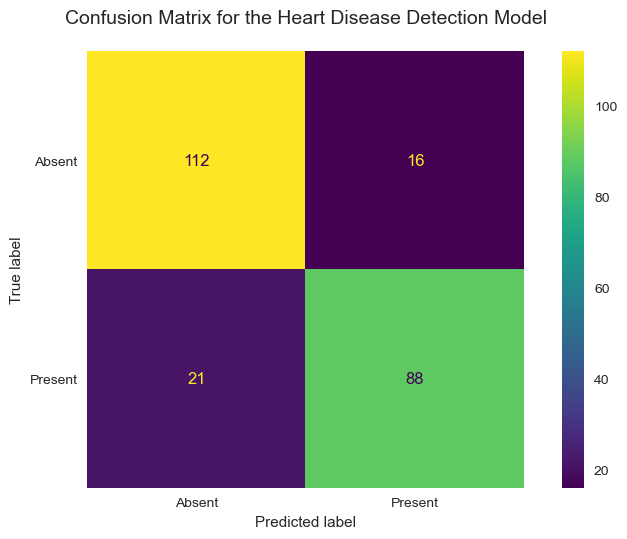

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       128
           1       0.85      0.81      0.83       109

    accuracy                           0.84       237
   macro avg       0.84      0.84      0.84       237
weighted avg       0.84      0.84      0.84       237


Detailed Performance Metrics:
True Positives (TP): 88
True Negatives (TN): 112
False Positives (FP): 16
False Negatives (FN): 21

Sensitivity (Recall): 0.8073
Specificity: 0.8750
Precision: 0.8462
F1 Score: 0.8263


In [34]:
evaluate_model(y_train, y_train_pred, y_train_prob)

The model performs well on the training set, with an accuracy of 84%, which demonstrates good predictive performance.

That means that 88% of actual negative cases in the training set were correctly identified, while only 81% of actual positive cases were correctly identified.

This suggests that the model is reliable for initial clinical screening. It's more reliable at ruling out heart disease due to its high specificity, but I'll run it on the test set before making final my ruling.

## Final Model Evaluation <a name="final_model_evaluation"></a>

I'm now ready to evaluate the model on the test set. I expect the test metrics to be slightly lower than the training ones.

In [35]:
# We only want to use the selected predictors
X_test = X_test[predictors]
y_test_pred = model.predict(X_test)
y_test_prob = model.predict_proba(X_test)[:, 1]

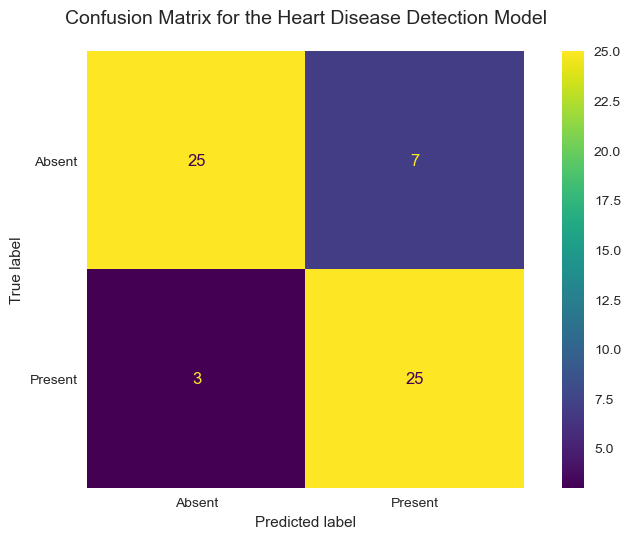

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.78      0.83        32
           1       0.78      0.89      0.83        28

    accuracy                           0.83        60
   macro avg       0.84      0.84      0.83        60
weighted avg       0.84      0.83      0.83        60


Detailed Performance Metrics:
True Positives (TP): 25
True Negatives (TN): 25
False Positives (FP): 7
False Negatives (FN): 3

Sensitivity (Recall): 0.8929
Specificity: 0.7812
Precision: 0.7812
F1 Score: 0.8333


In [36]:
evaluate_model(y_test, y_test_pred, y_test_prob)

## Conclusions and Next Steps <a name="conclusions_and_next_steps"></a>

In evaluating the performance of the logistic regression model for heart disease prediction, a comprehensive analysis reveals a robust and promising predictive tool with nuanced characteristics that require careful consideration.

The model's performance across both training and test datasets demonstrates remarkable consistency, with accuracies hovering around 83-84%. This stability suggests the model has successfully captured underlying patterns in the data without overfitting, a critical concern in medical predictive modelling. While the sensitivity and specificity show slight variations between the training and test datasets, these changes remain modest, further supporting the model's overall robustness and generalizability.

The test data results particularly illuminate the model's diagnostic capabilities. With a sensitivity of 0.8929, the model successfully identifies nearly 90% of positive heart disease cases, a critical metric in medical screening. This high sensitivity means the model is particularly adept at detecting potential heart disease, minimizing the risk of overlooking critical cases. The precision of 0.7812 complements this, indicating that when the model predicts a positive case, it is correct approximately 78% of the time.

The symmetric distribution of true positives and true negatives (both at 25) further underscores the model's balanced performance. This equilibrium is particularly valuable in medical diagnostics, where false positives and negatives carry significant clinical implications. The low number of false negatives (3 out of 28 positive cases) is especially reassuring, as missing potential heart disease cases can have serious consequences.

However, the model is not without limitations. The specificity of 0.7812 suggests there is room for improvement in accurately ruling out heart disease in negative cases. The 7 false positives out of 32 negative cases indicate that the model occasionally flags healthy individuals as potentially at risk, which could lead to unnecessary medical interventions or patient anxiety.

From a clinical perspective, this model serves as a promising screening tool. It should be viewed as a supportive diagnostic aid rather than a definitive diagnostic instrument. The consistent performance across training and test datasets suggests the model's generalizability, but further validation with larger and more diverse datasets would strengthen its clinical applicability.

Recommendations for future development:
* Continued refinement of feature selection
* Exploration of more advanced machine learning techniques
* Most importantly: rigorous clinical validation by medical professionals.

The model represents a significant step towards leveraging data science in early heart disease detection, offering a potentially valuable tool in preventative healthcare.